In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

In [3]:
df = pd.read_csv("CAvideos.csv")

In [4]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [7]:
df[df["description"].apply(lambda x: pd.isna(x))].head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
98,lHcXhBojpeQ,17.14.11,三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！,明星百曉生,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,NaN
115,_QHEPUKBn9g,17.14.11,‘Too Alabama for Alabama’: SNL brutally mocks ...,MAXI POWER,23,2017-11-12T05:01:18.000Z,[none],20163,44,34,8,https://i.ytimg.com/vi/_QHEPUKBn9g/default.jpg,False,False,False,NaN
128,JdHovvb0KD4,17.14.11,Pres. Trump: Putin's Denials Of Interference I...,The View,25,2017-11-13T16:10:21.000Z,"donald trump|""vladimir putin""|""the view""|""hot ...",72253,1217,146,569,https://i.ytimg.com/vi/JdHovvb0KD4/default.jpg,False,False,False,NaN
165,OA0vhAKUD0g,17.14.11,Outlander S03E09 i'm melting with you'',Ella bell,1,2017-11-12T22:33:48.000Z,[none],32941,149,2,5,https://i.ytimg.com/vi/OA0vhAKUD0g/default.jpg,False,False,False,NaN
179,psDauoxUj9A,17.14.11,شاهد انبهار الاعلام المصري بتأهل المغرب لكأس ...,Info Press,17,2017-11-11T22:04:37.000Z,[none],624328,7100,398,971,https://i.ytimg.com/vi/psDauoxUj9A/default.jpg,False,False,False,NaN


In [8]:
df["description"] = df["description"].fillna(value="")

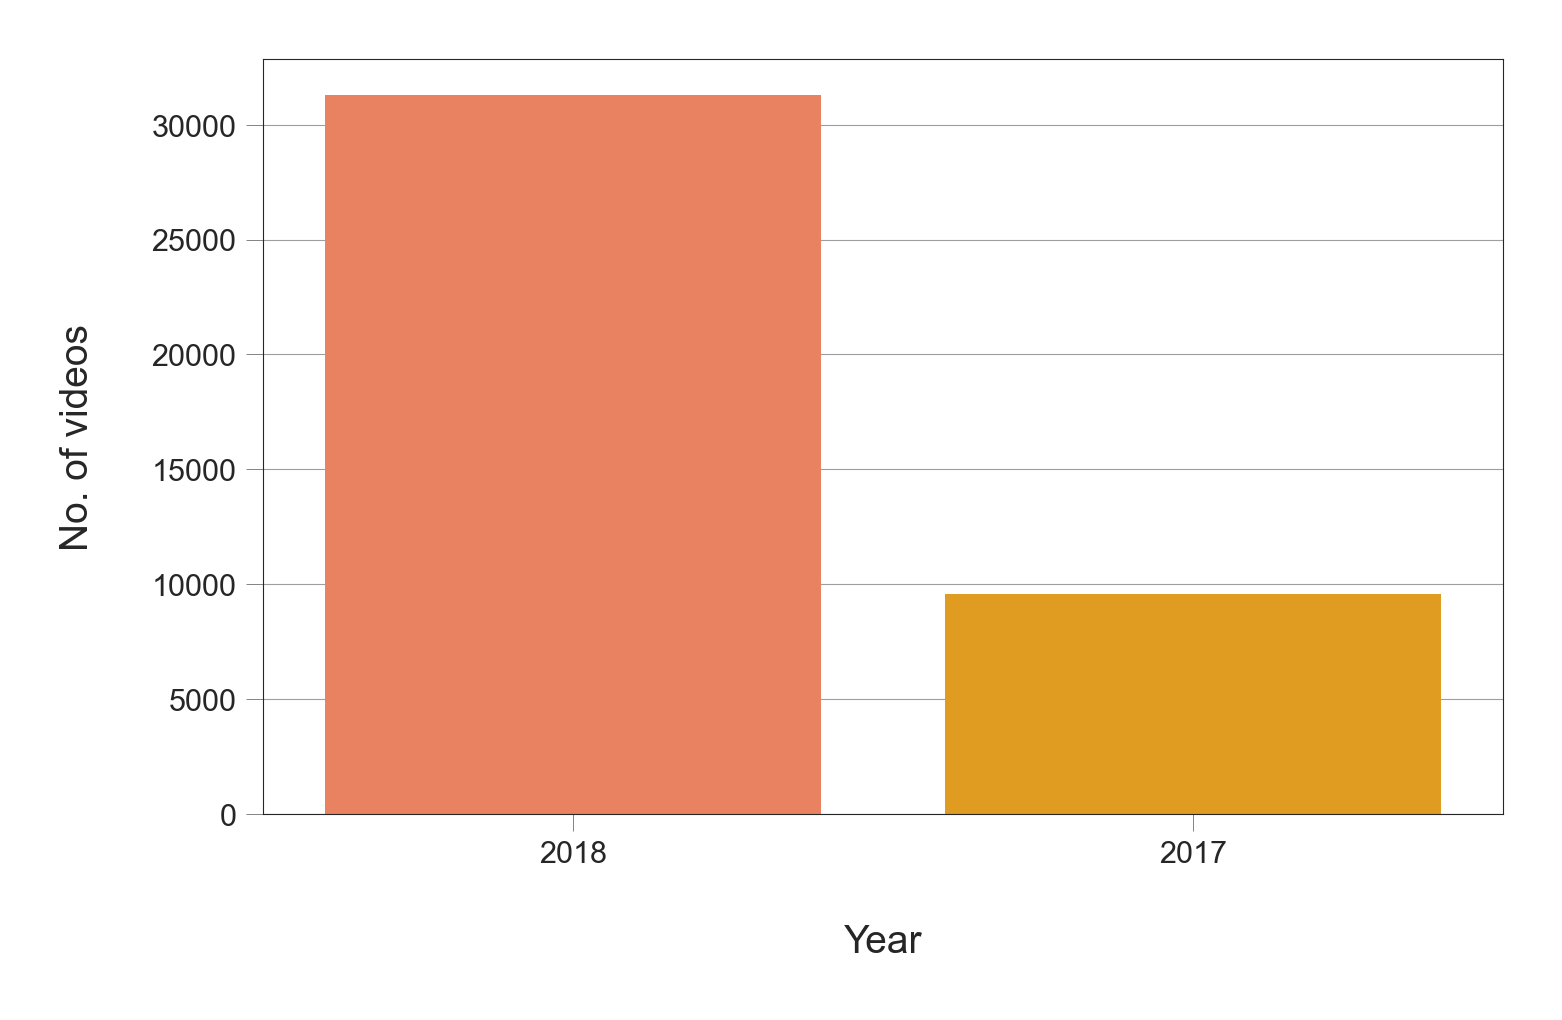

In [9]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [10]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

In [11]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.00,40881.00,40881.00,40881.00,40881.00
mean,20.80,1147035.91,39582.69,2009.20,5042.97
std,6.78,3390913.02,132689.53,19008.37,21579.02
min,1.00,733.00,0.00,0.00,0.00
25%,20.00,143902.00,2191.00,99.00,417.00
50%,24.00,371204.00,8780.00,303.00,1301.00
75%,24.00,963302.00,28717.00,950.00,3713.00
max,43.00,137843120.00,5053338.00,1602383.00,1114800.00


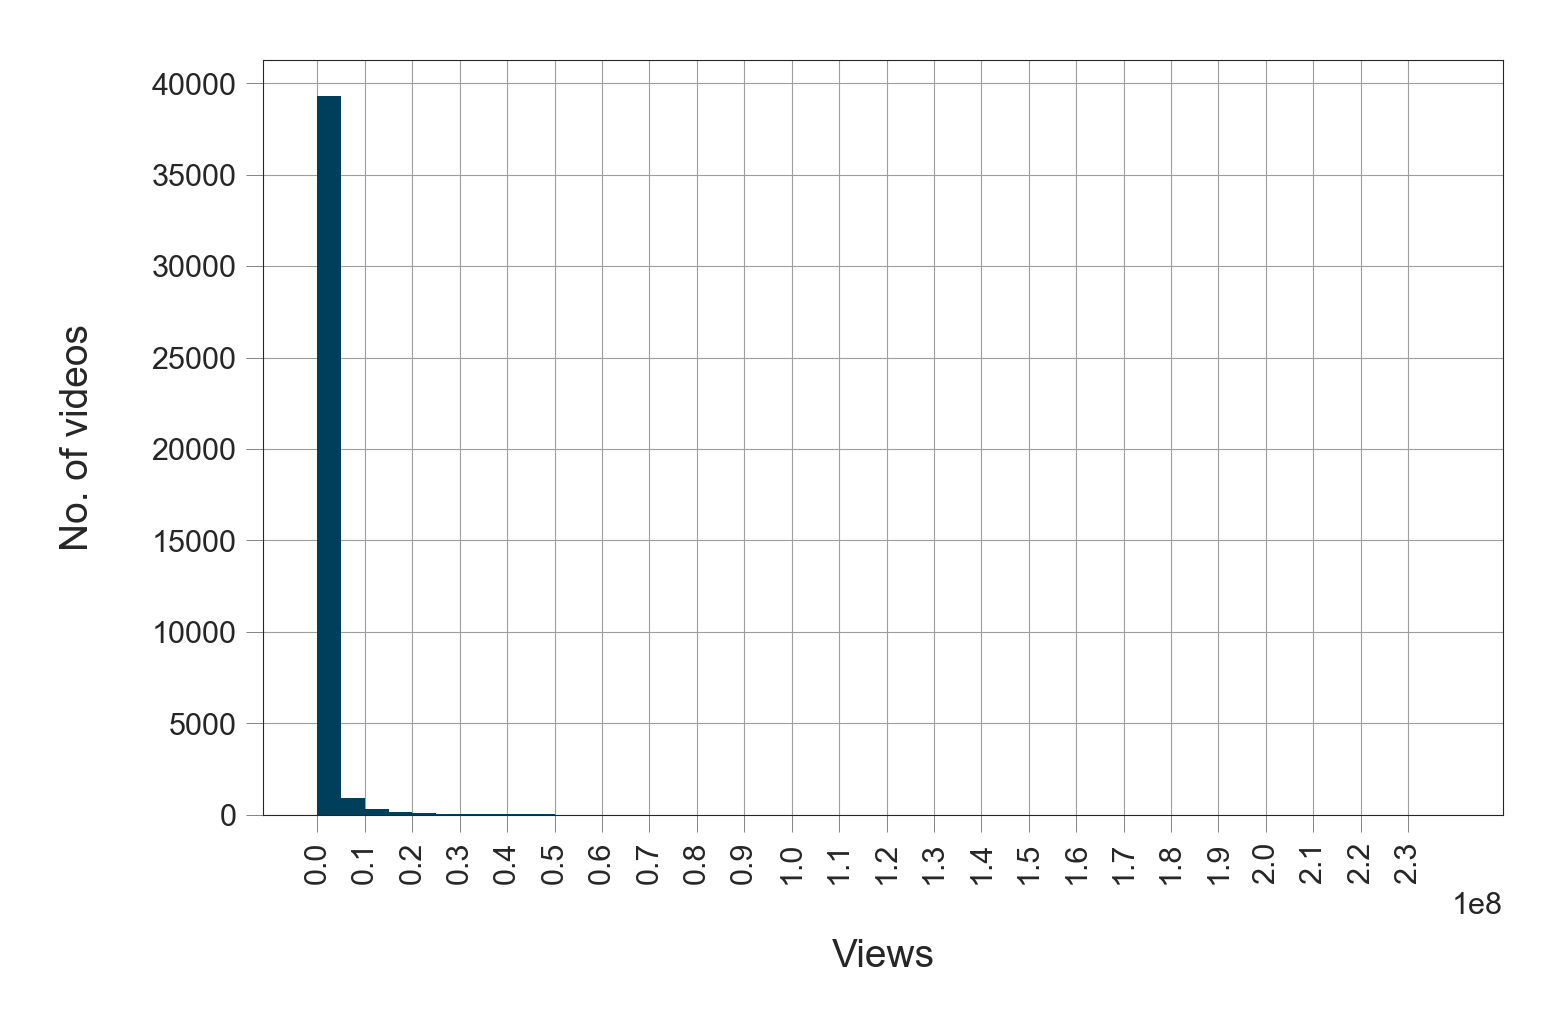

In [12]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

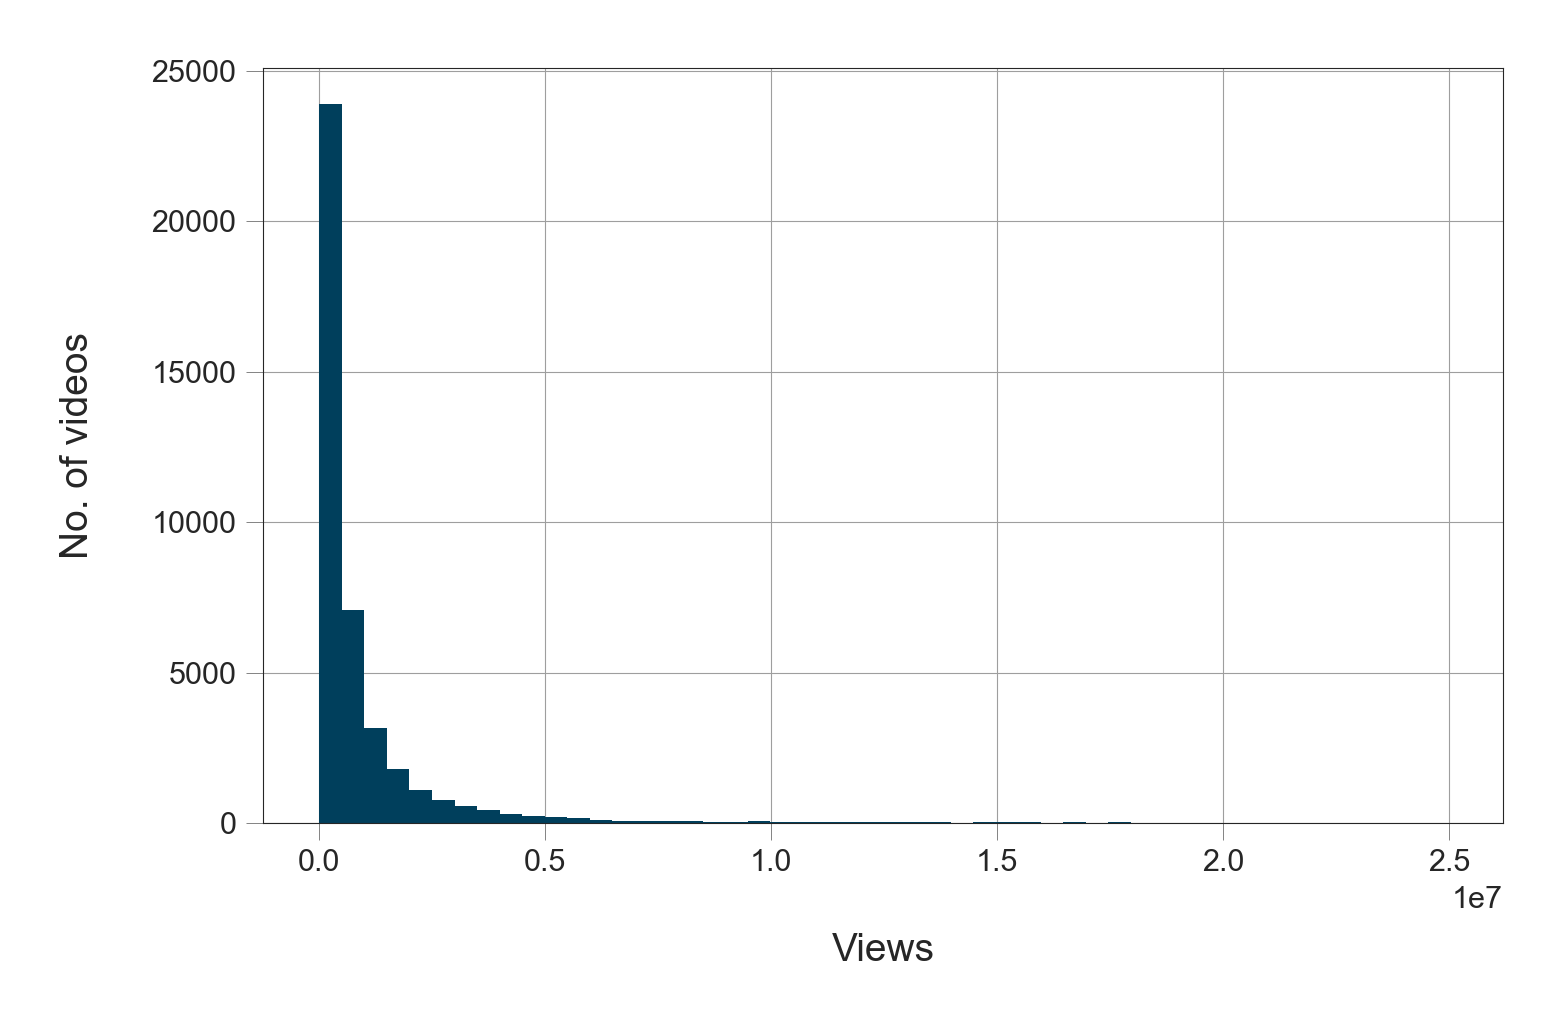

In [13]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [14]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

75.8200631100022

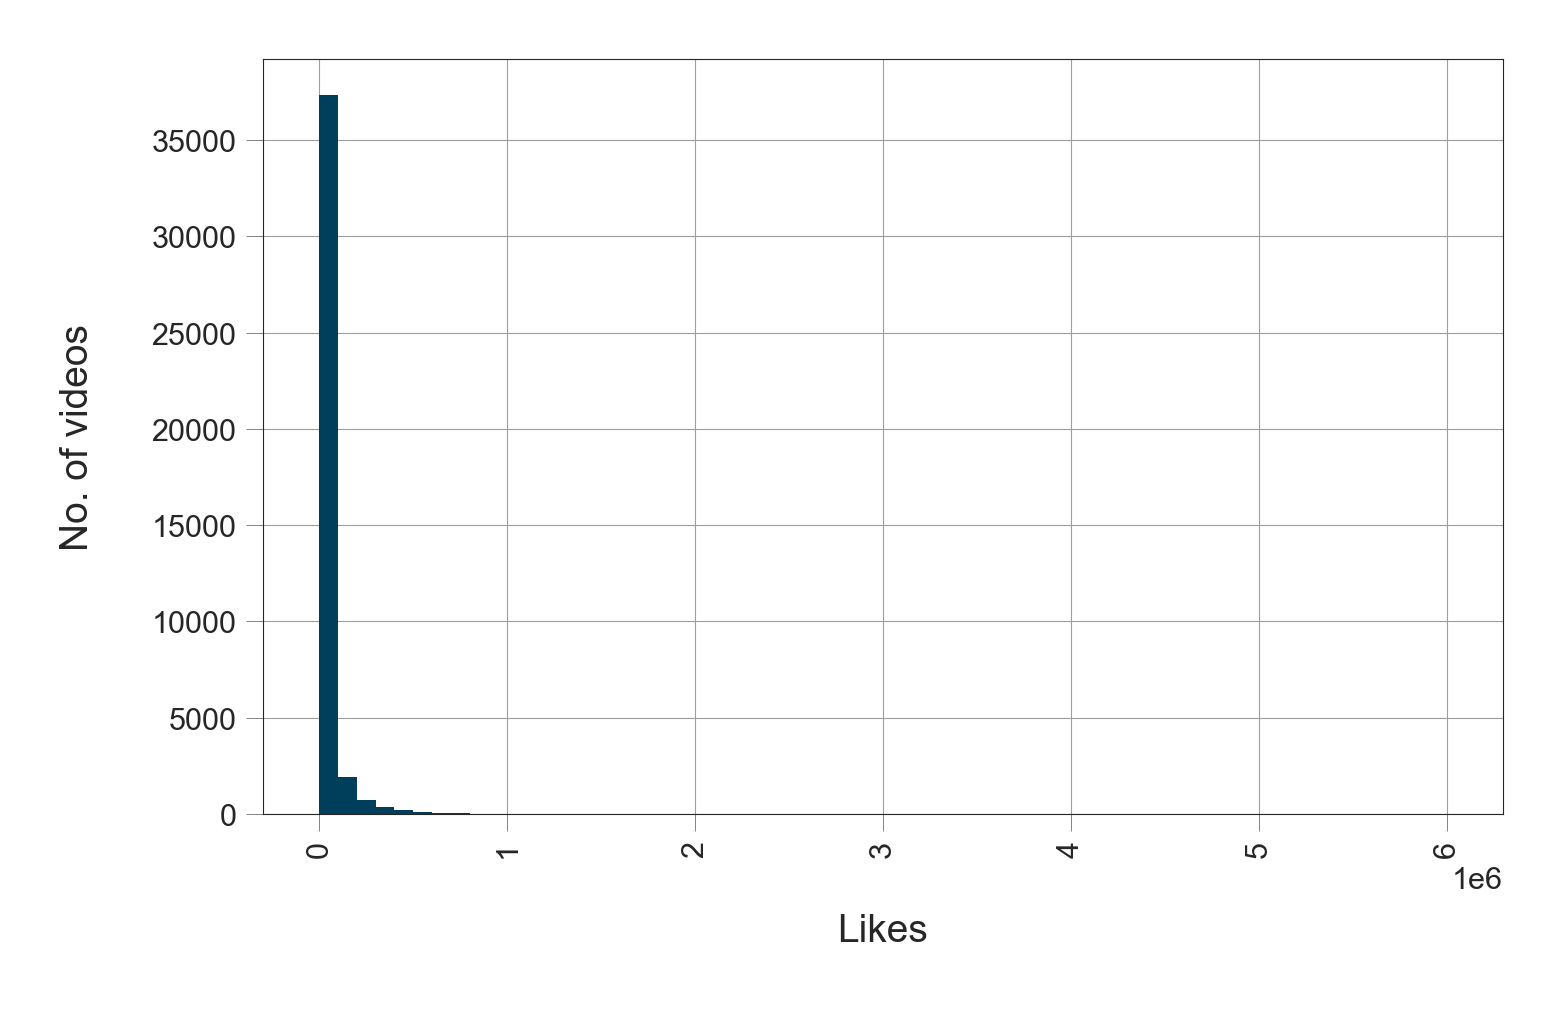

In [15]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

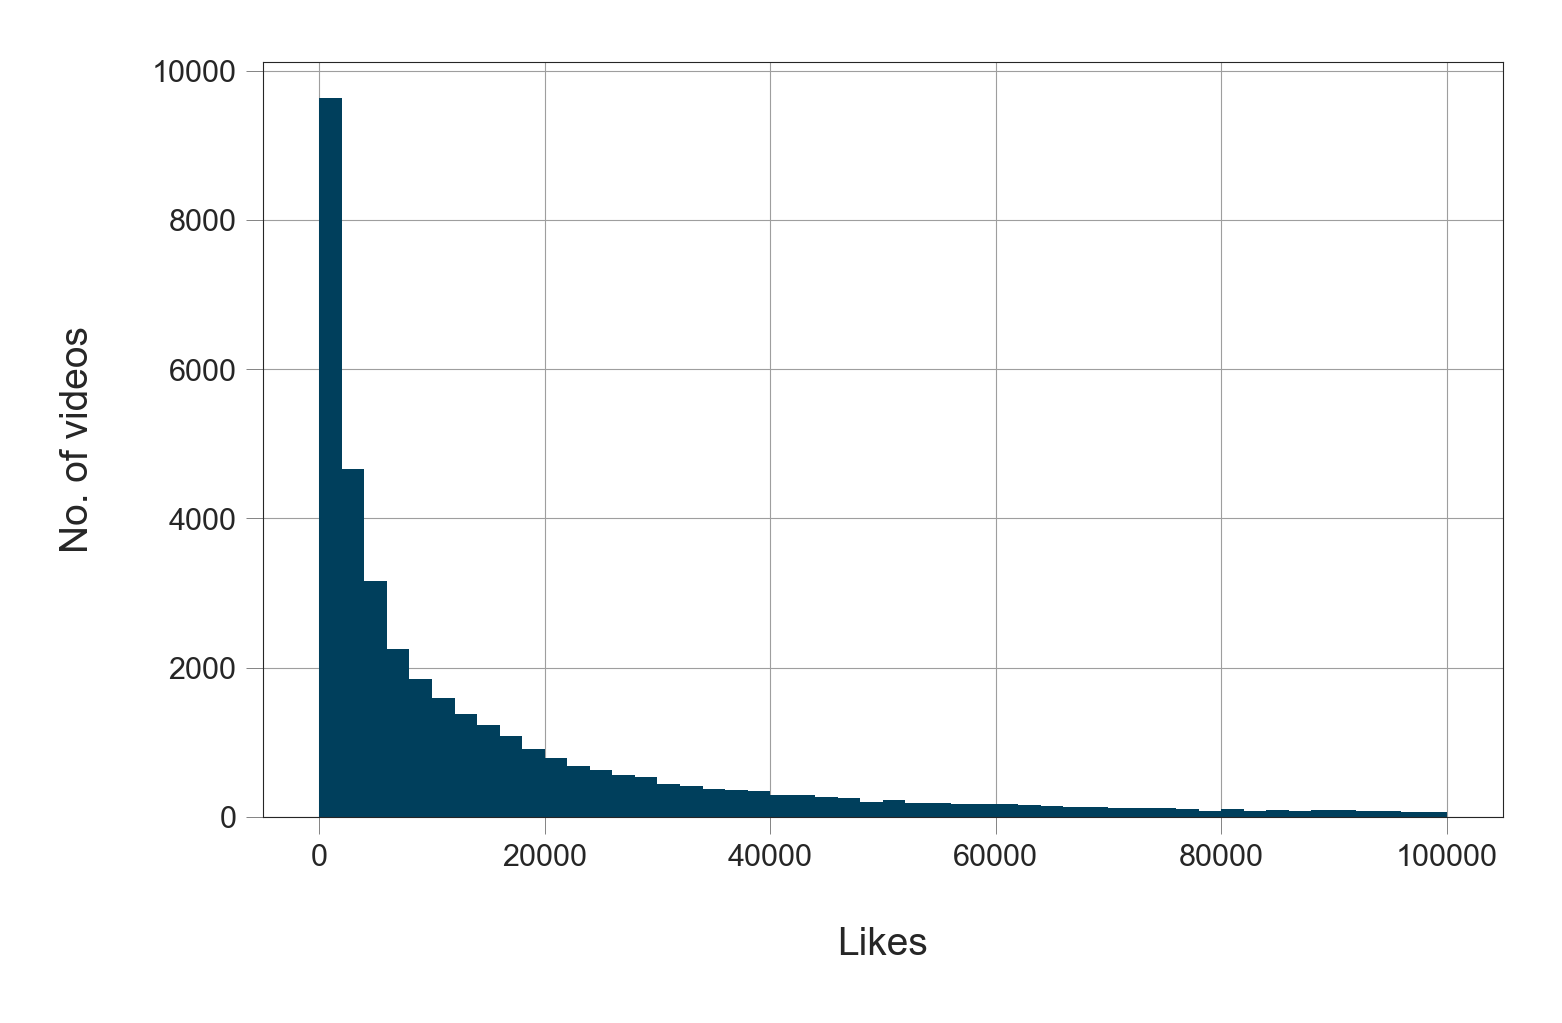

In [16]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [17]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

80.5802206403953

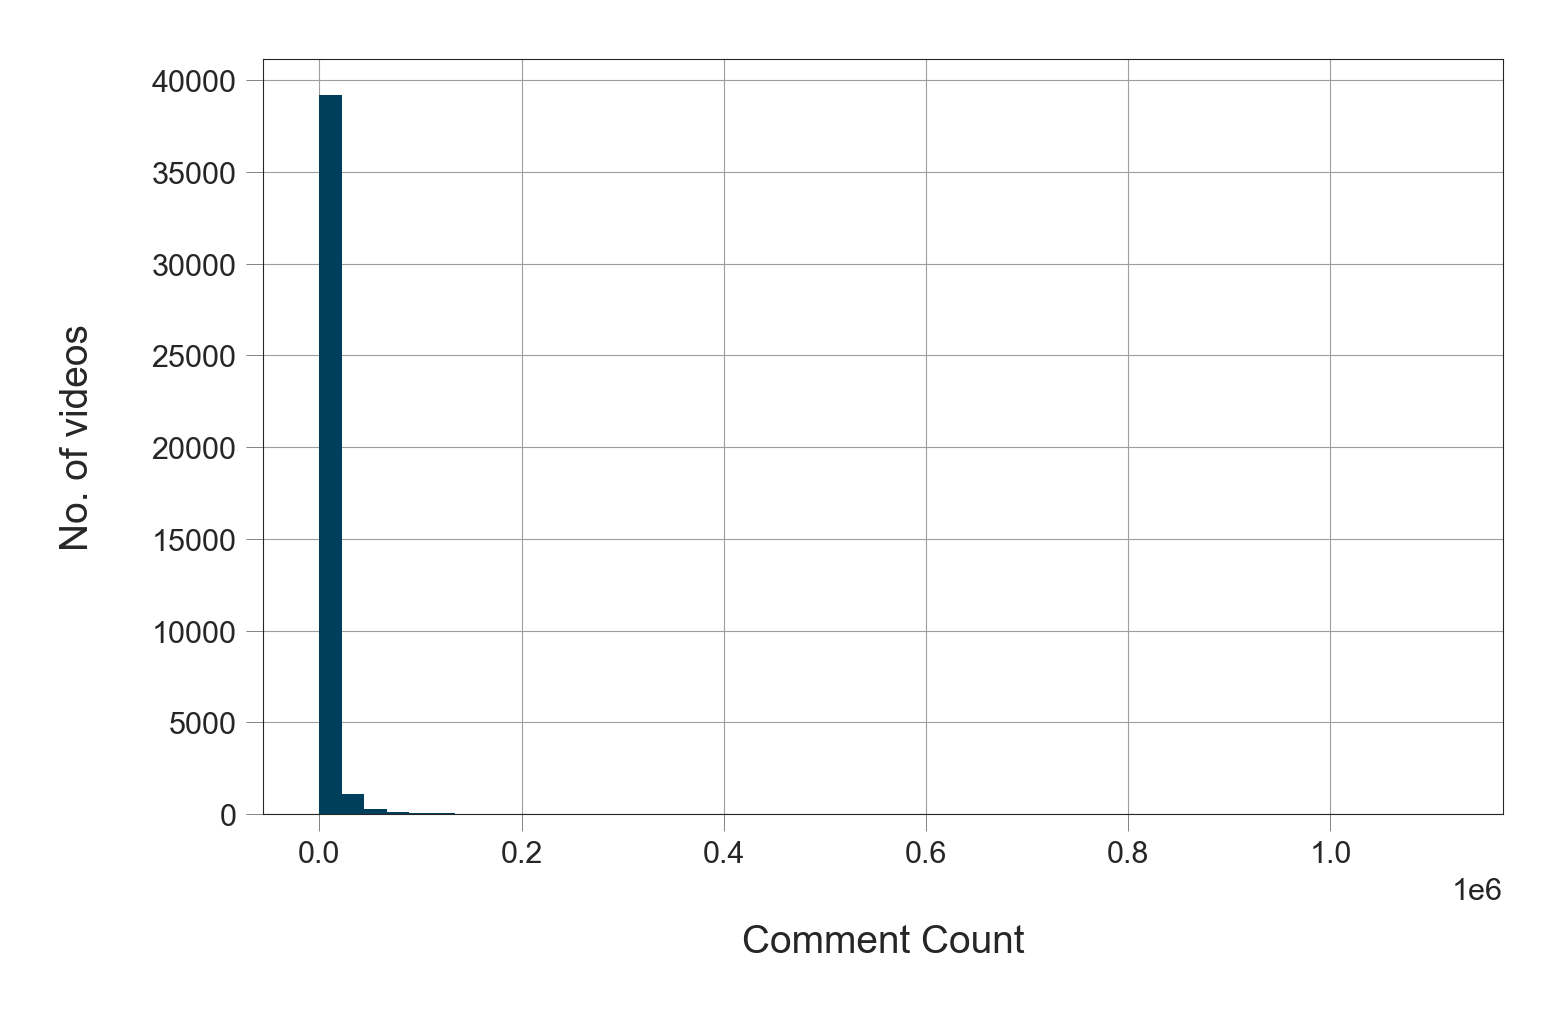

In [18]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

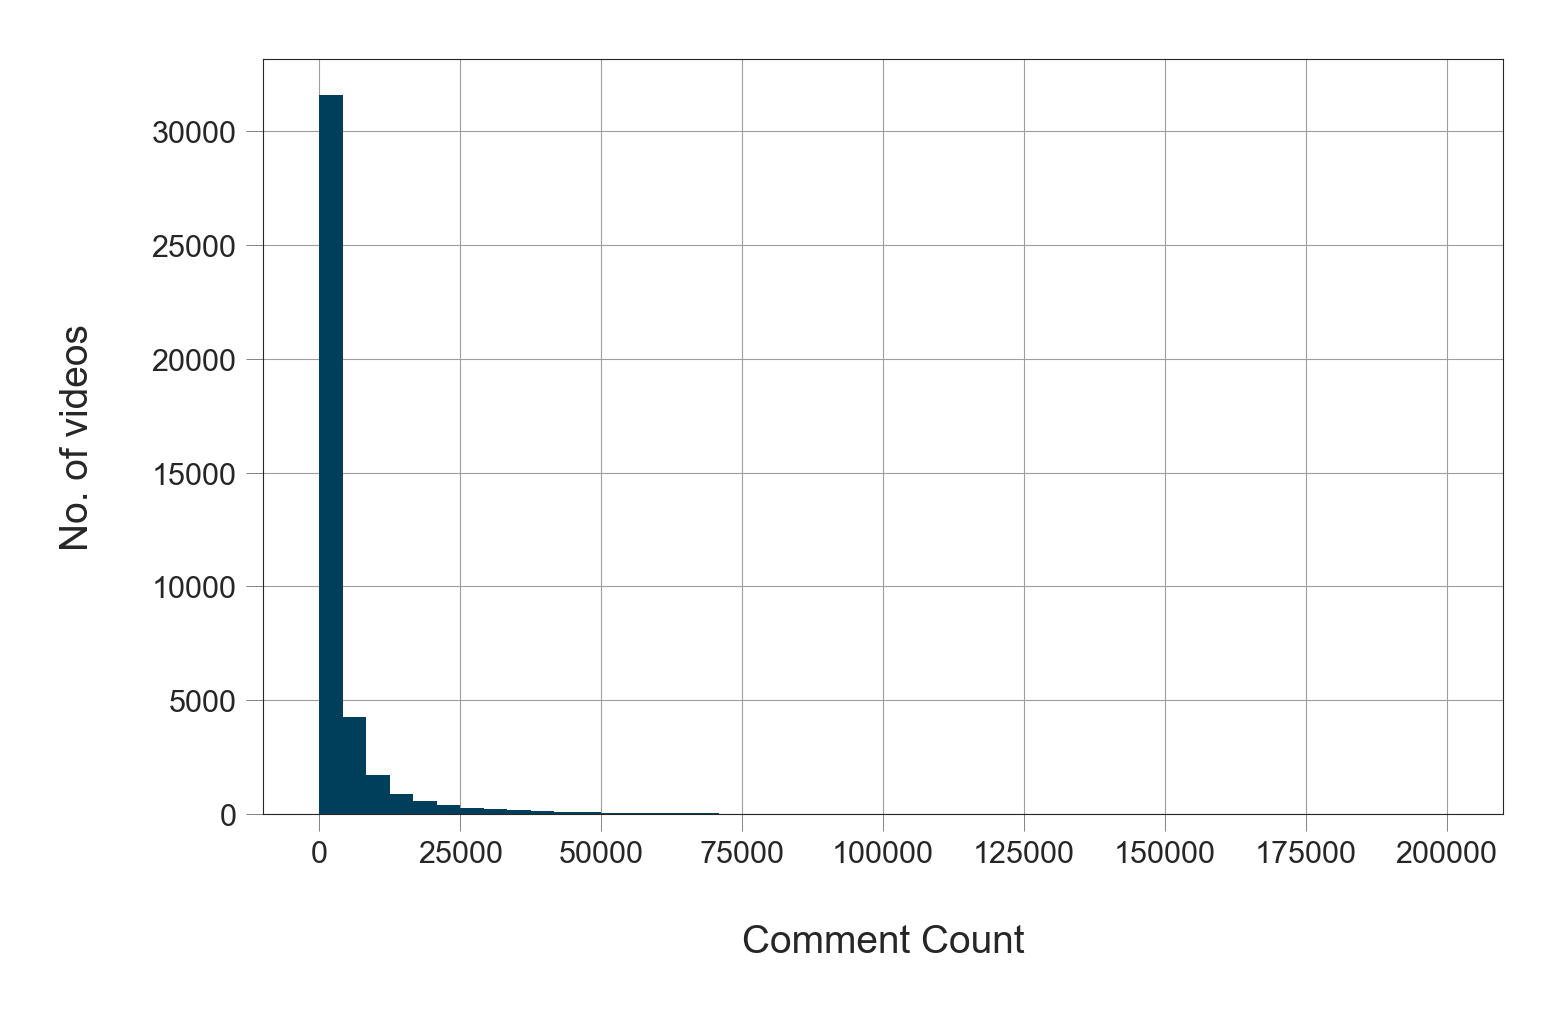

In [19]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [20]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

76.51720848315844

In [21]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40881,40881,40881,40881,40881,40881,40881,40881
unique,24427,205,24573,5076,23613,20157,24422,22346
top,6ZfuNTqbHE8,17.14.11,Most Popular Violin Covers of Popular Songs 20...,SET India,2017-12-20T23:00:00.000Z,[none],https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,
freq,8,200,15,192,11,2385,8,1296


In [22]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
4266,-IuqwJiuuj0,17.05.12,Sau Ánh Hào Quang | Tập 10 FULL: Lê Giang và b...,ĐÔNG TÂY PROMOTION OFFICIAL,24,2017-12-04T15:09:14.000Z,"sau anh hao quang|""sau ánh hào quang""|""sau anh...",742343,7407,399,1551,https://i.ytimg.com/vi/-IuqwJiuuj0/default.jpg,False,False,False,Sau Ánh Hào Quang | Tập 10 FULL: Lê Giang và b...
4534,-IuqwJiuuj0,17.06.12,Sau Ánh Hào Quang | Tập 10 FULL: Trấn Thành th...,ĐÔNG TÂY PROMOTION OFFICIAL,24,2017-12-04T15:09:14.000Z,"sau anh hao quang|""sau ánh hào quang""|""sau anh...",1204074,10003,578,2020,https://i.ytimg.com/vi/-IuqwJiuuj0/default.jpg,False,False,False,Sau Ánh Hào Quang | Tập 10 FULL: Lê Giang và b...


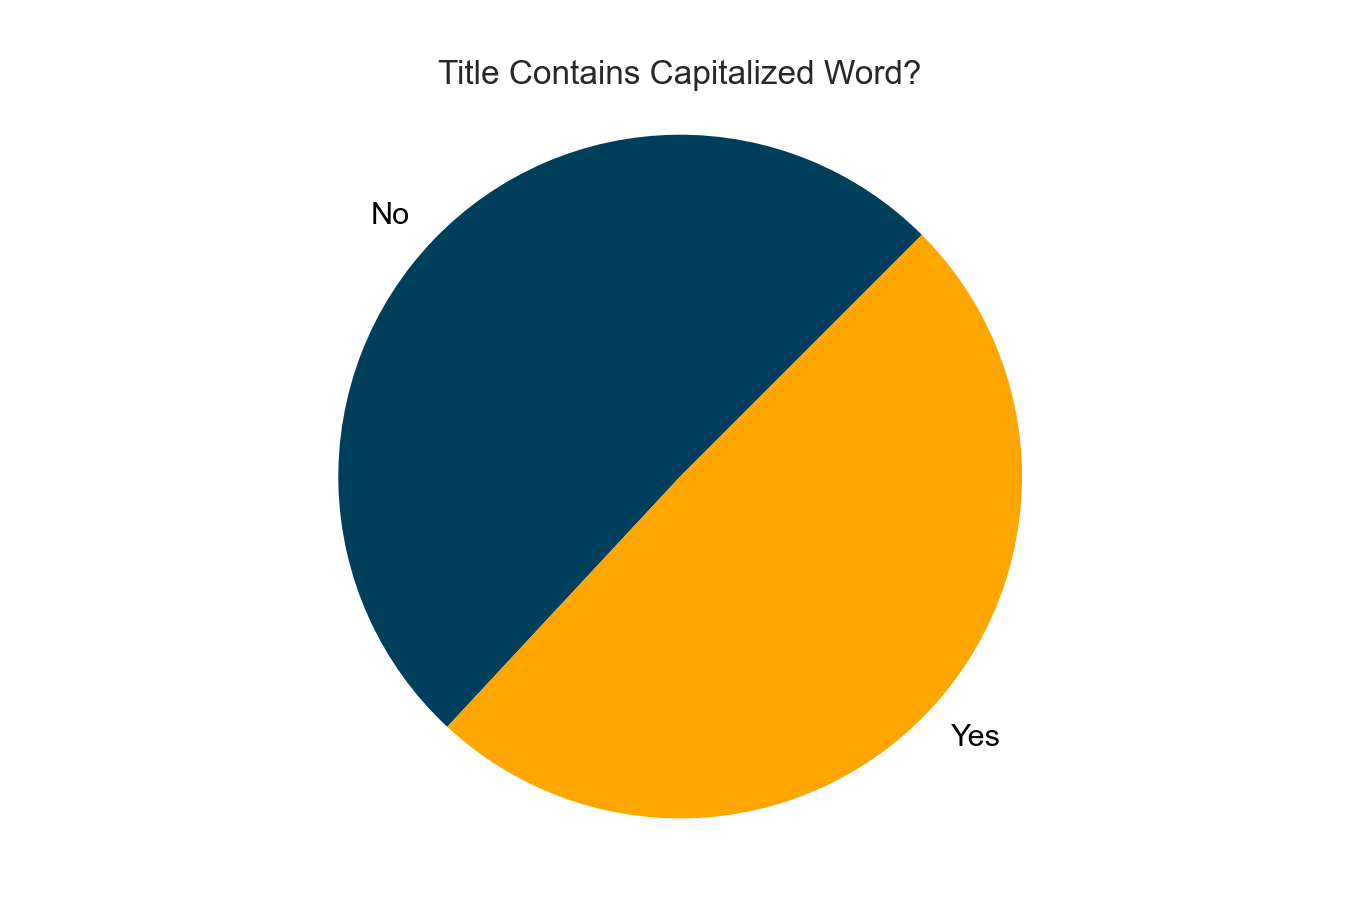

In [23]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [24]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.51
True    0.49
Name: contains_capitalized, dtype: float64

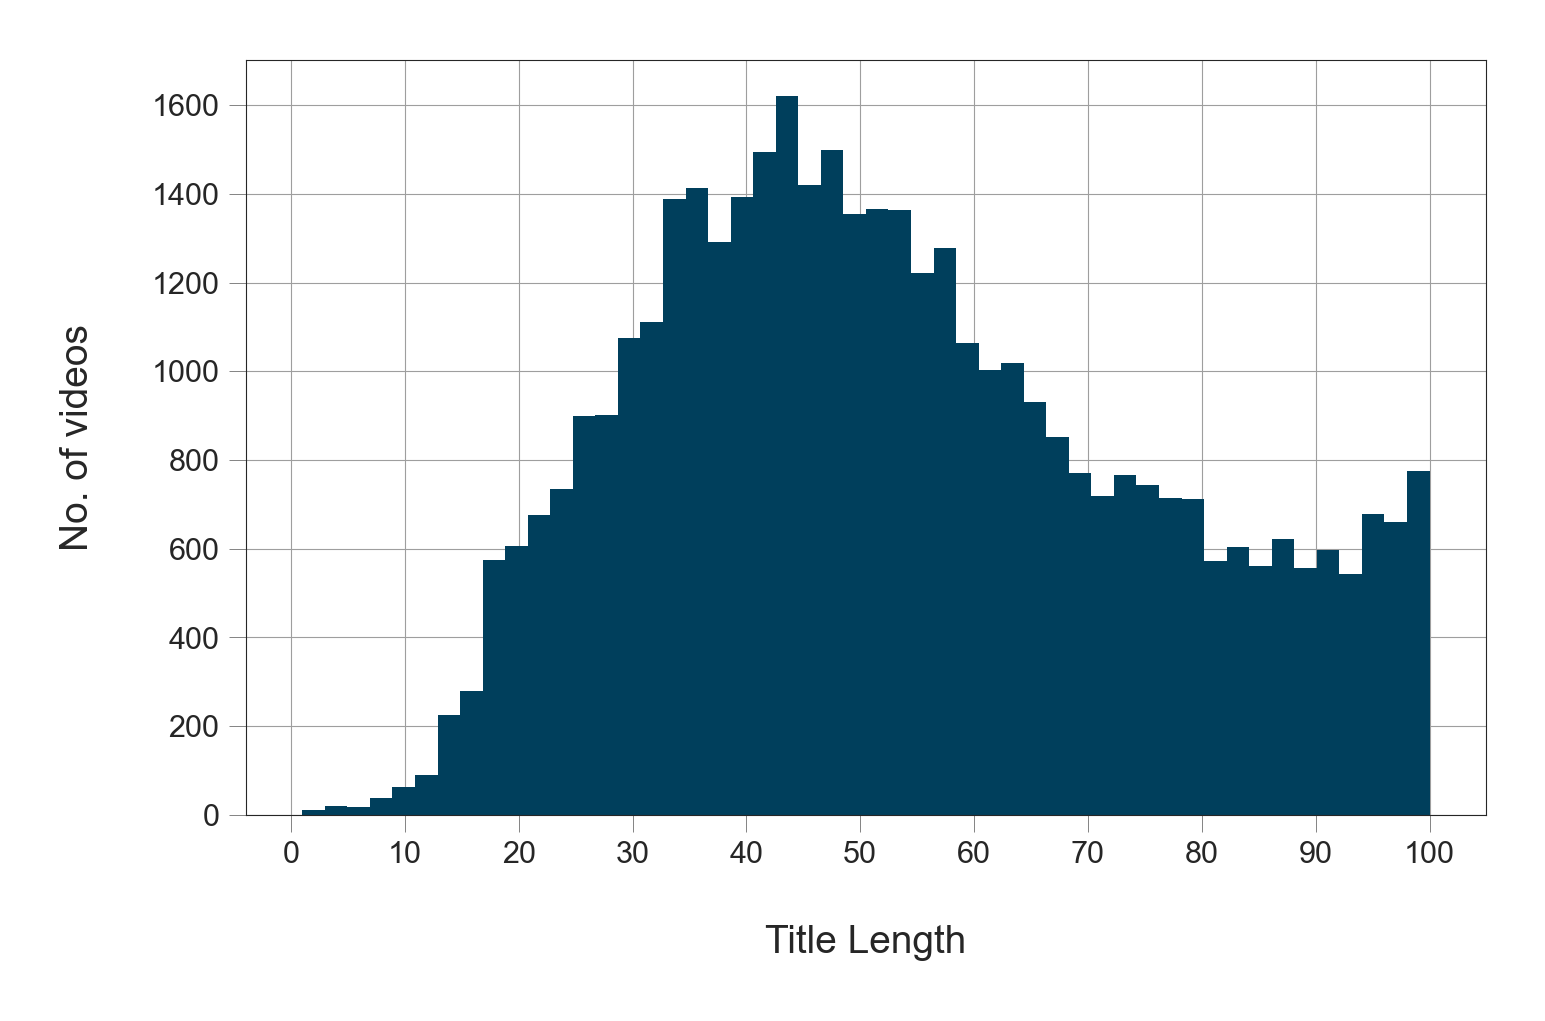

In [25]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

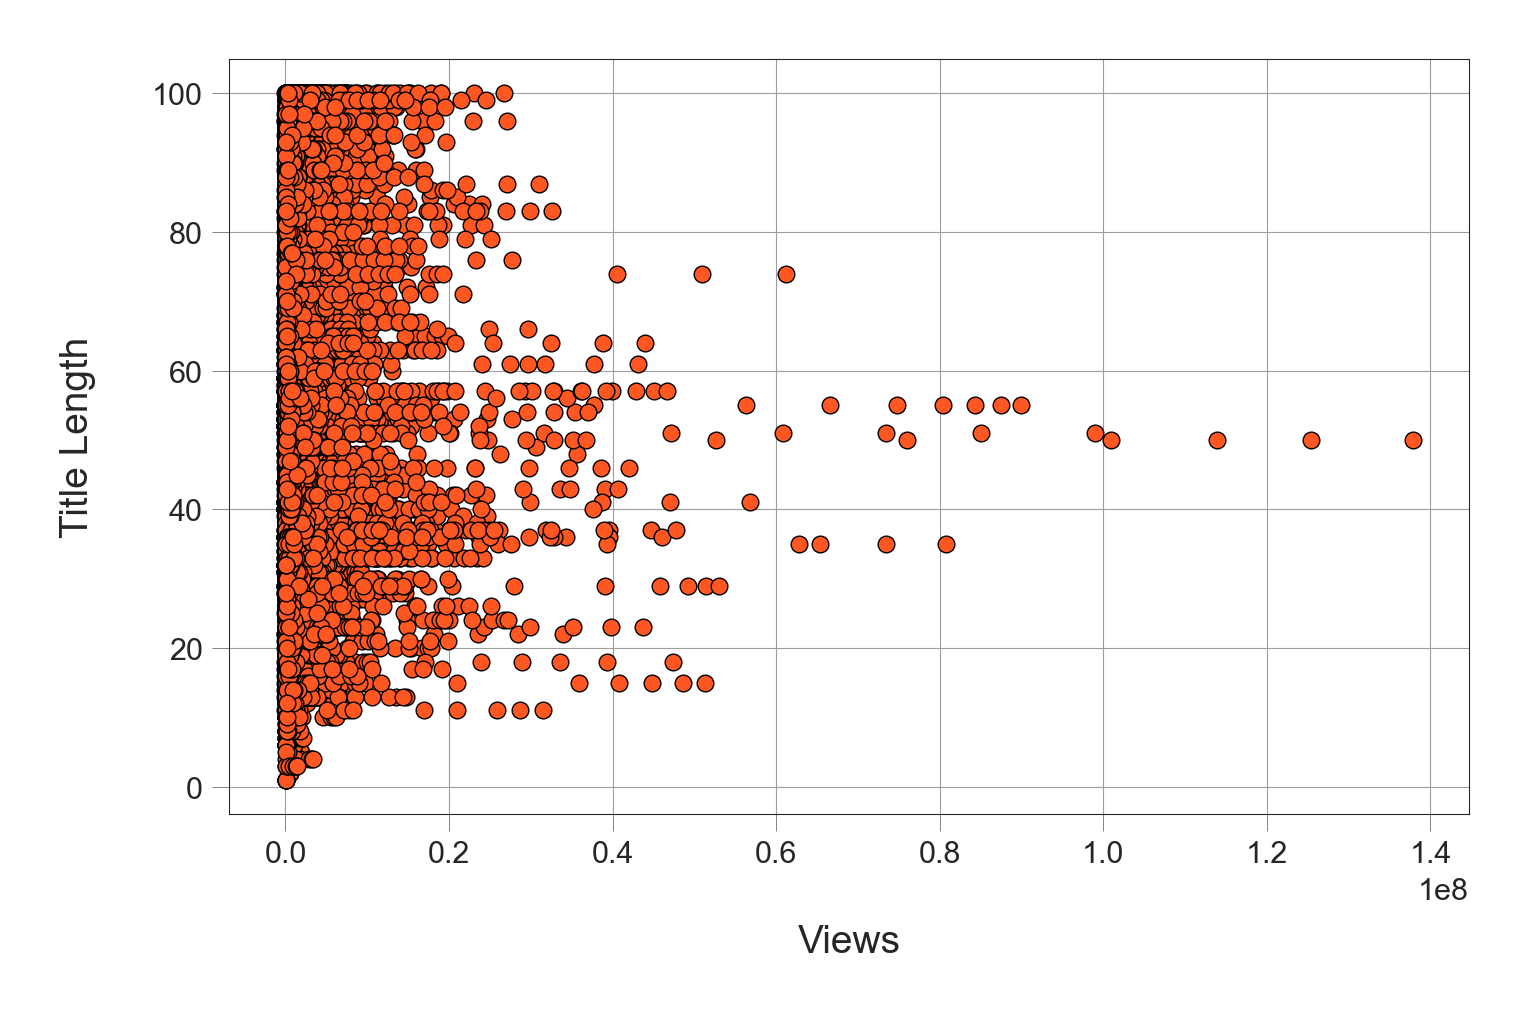

In [26]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

In [27]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.14,-0.14,-0.03,-0.07,0.04,0.02,-0.03,-0.00,-0.05
views,-0.14,1.00,0.83,0.56,0.69,0.00,0.01,0.00,-0.02,-0.01
likes,-0.14,0.83,1.00,0.46,0.84,-0.02,-0.02,0.00,-0.01,-0.09
dislikes,-0.03,0.56,0.46,1.00,0.64,-0.01,-0.01,0.00,-0.02,-0.01
comment_count,-0.07,0.69,0.84,0.64,1.00,-0.03,-0.02,0.00,0.01,-0.06
comments_disabled,0.04,0.00,-0.02,-0.01,-0.03,1.00,0.15,-0.00,-0.03,0.03
ratings_disabled,0.02,0.01,-0.02,-0.01,-0.02,0.15,1.00,-0.00,-0.00,0.00
video_error_or_removed,-0.03,0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,-0.02,-0.03
contains_capitalized,-0.00,-0.02,-0.01,-0.02,0.01,-0.03,-0.00,-0.02,1.00,0.15
title_length,-0.05,-0.01,-0.09,-0.01,-0.06,0.03,0.00,-0.03,0.15,1.00


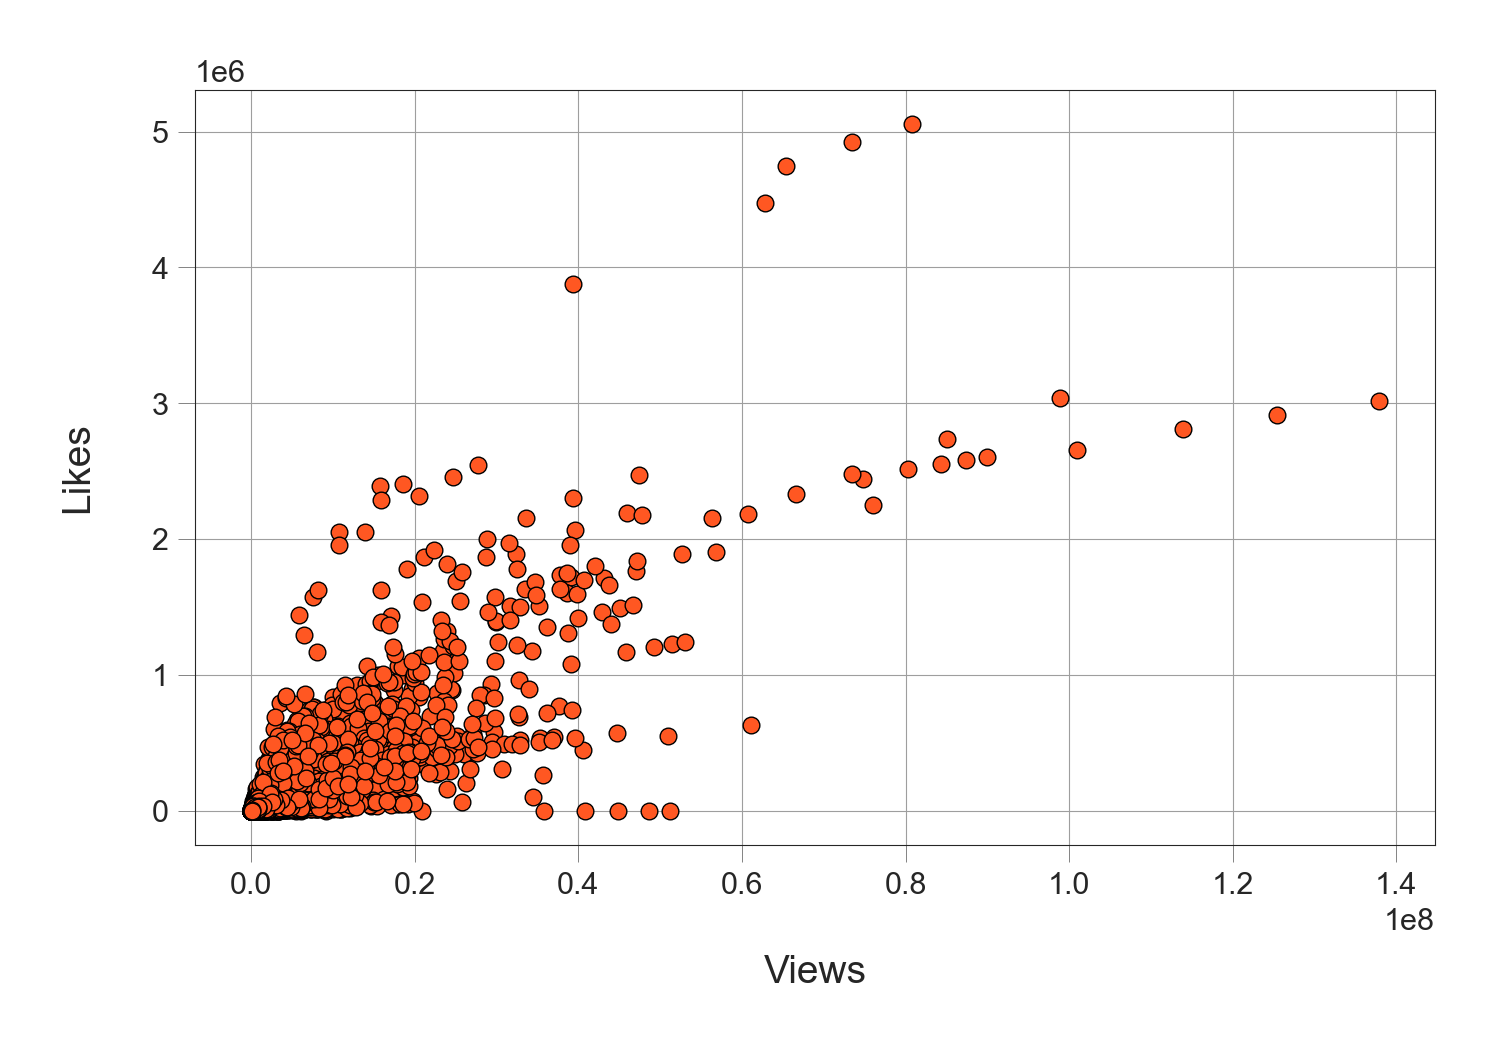

In [28]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [29]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 12666),
 ('|', 12596),
 ('The', 5167),
 ('2018', 3765),
 ('the', 2498),
 ('Episode', 2298),
 ('&', 2286),
 ('to', 1903),
 ('in', 1797),
 ('of', 1774),
 ('and', 1699),
 ('A', 1522),
 ('on', 1383),
 ('To', 1316),
 ('a', 1279),
 ('2017', 1202),
 ('with', 1200),
 ('vs', 1177),
 ('Game', 1094),
 ('Full', 1056),
 ('2', 1030),
 ('Trump', 962),
 ('I', 938),
 ('In', 930),
 ('Official', 930)]

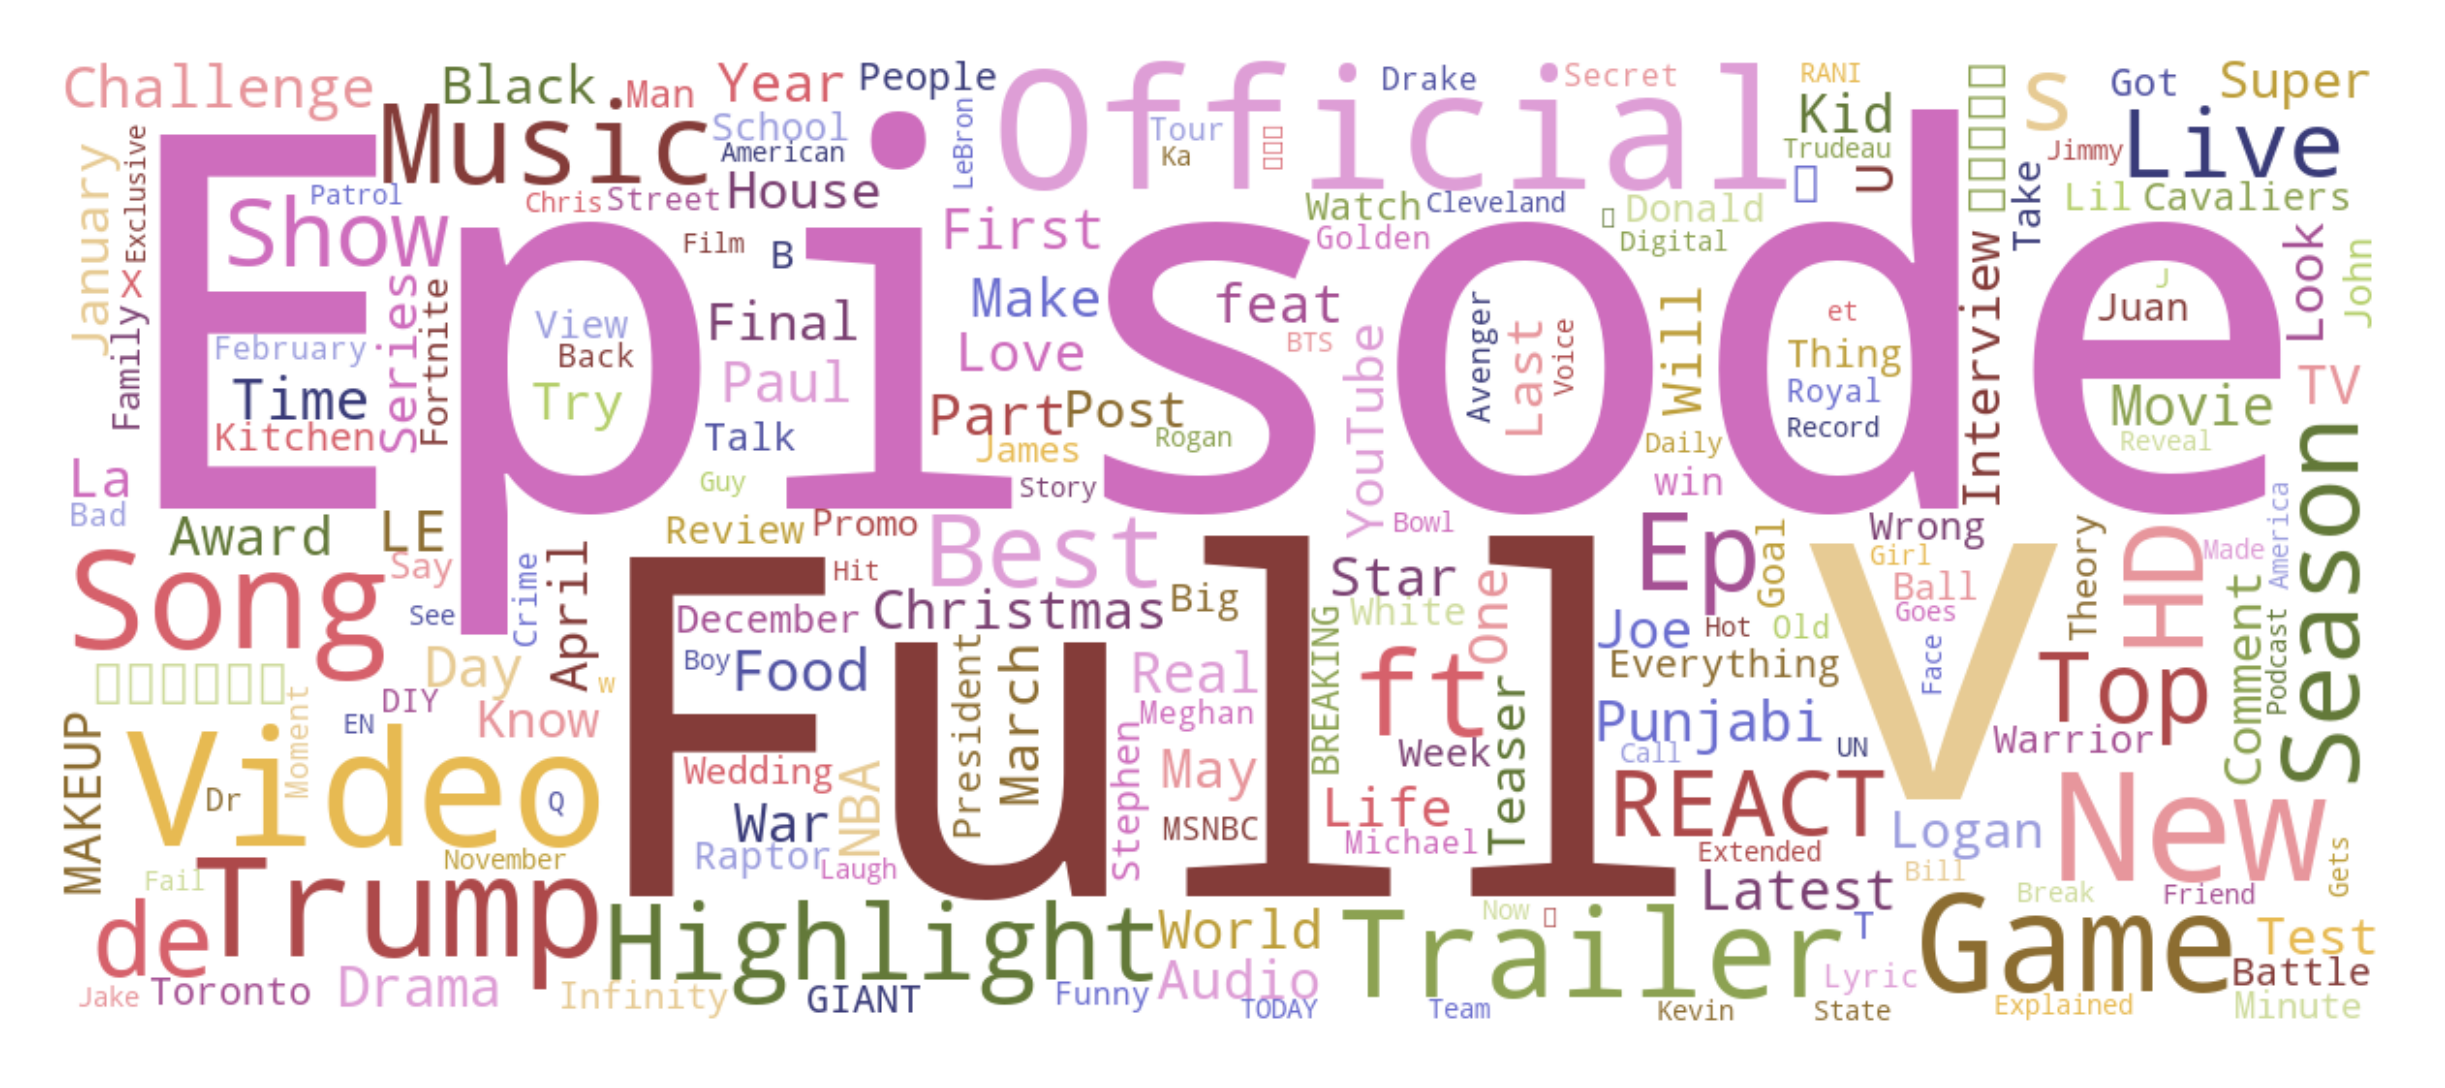

In [30]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

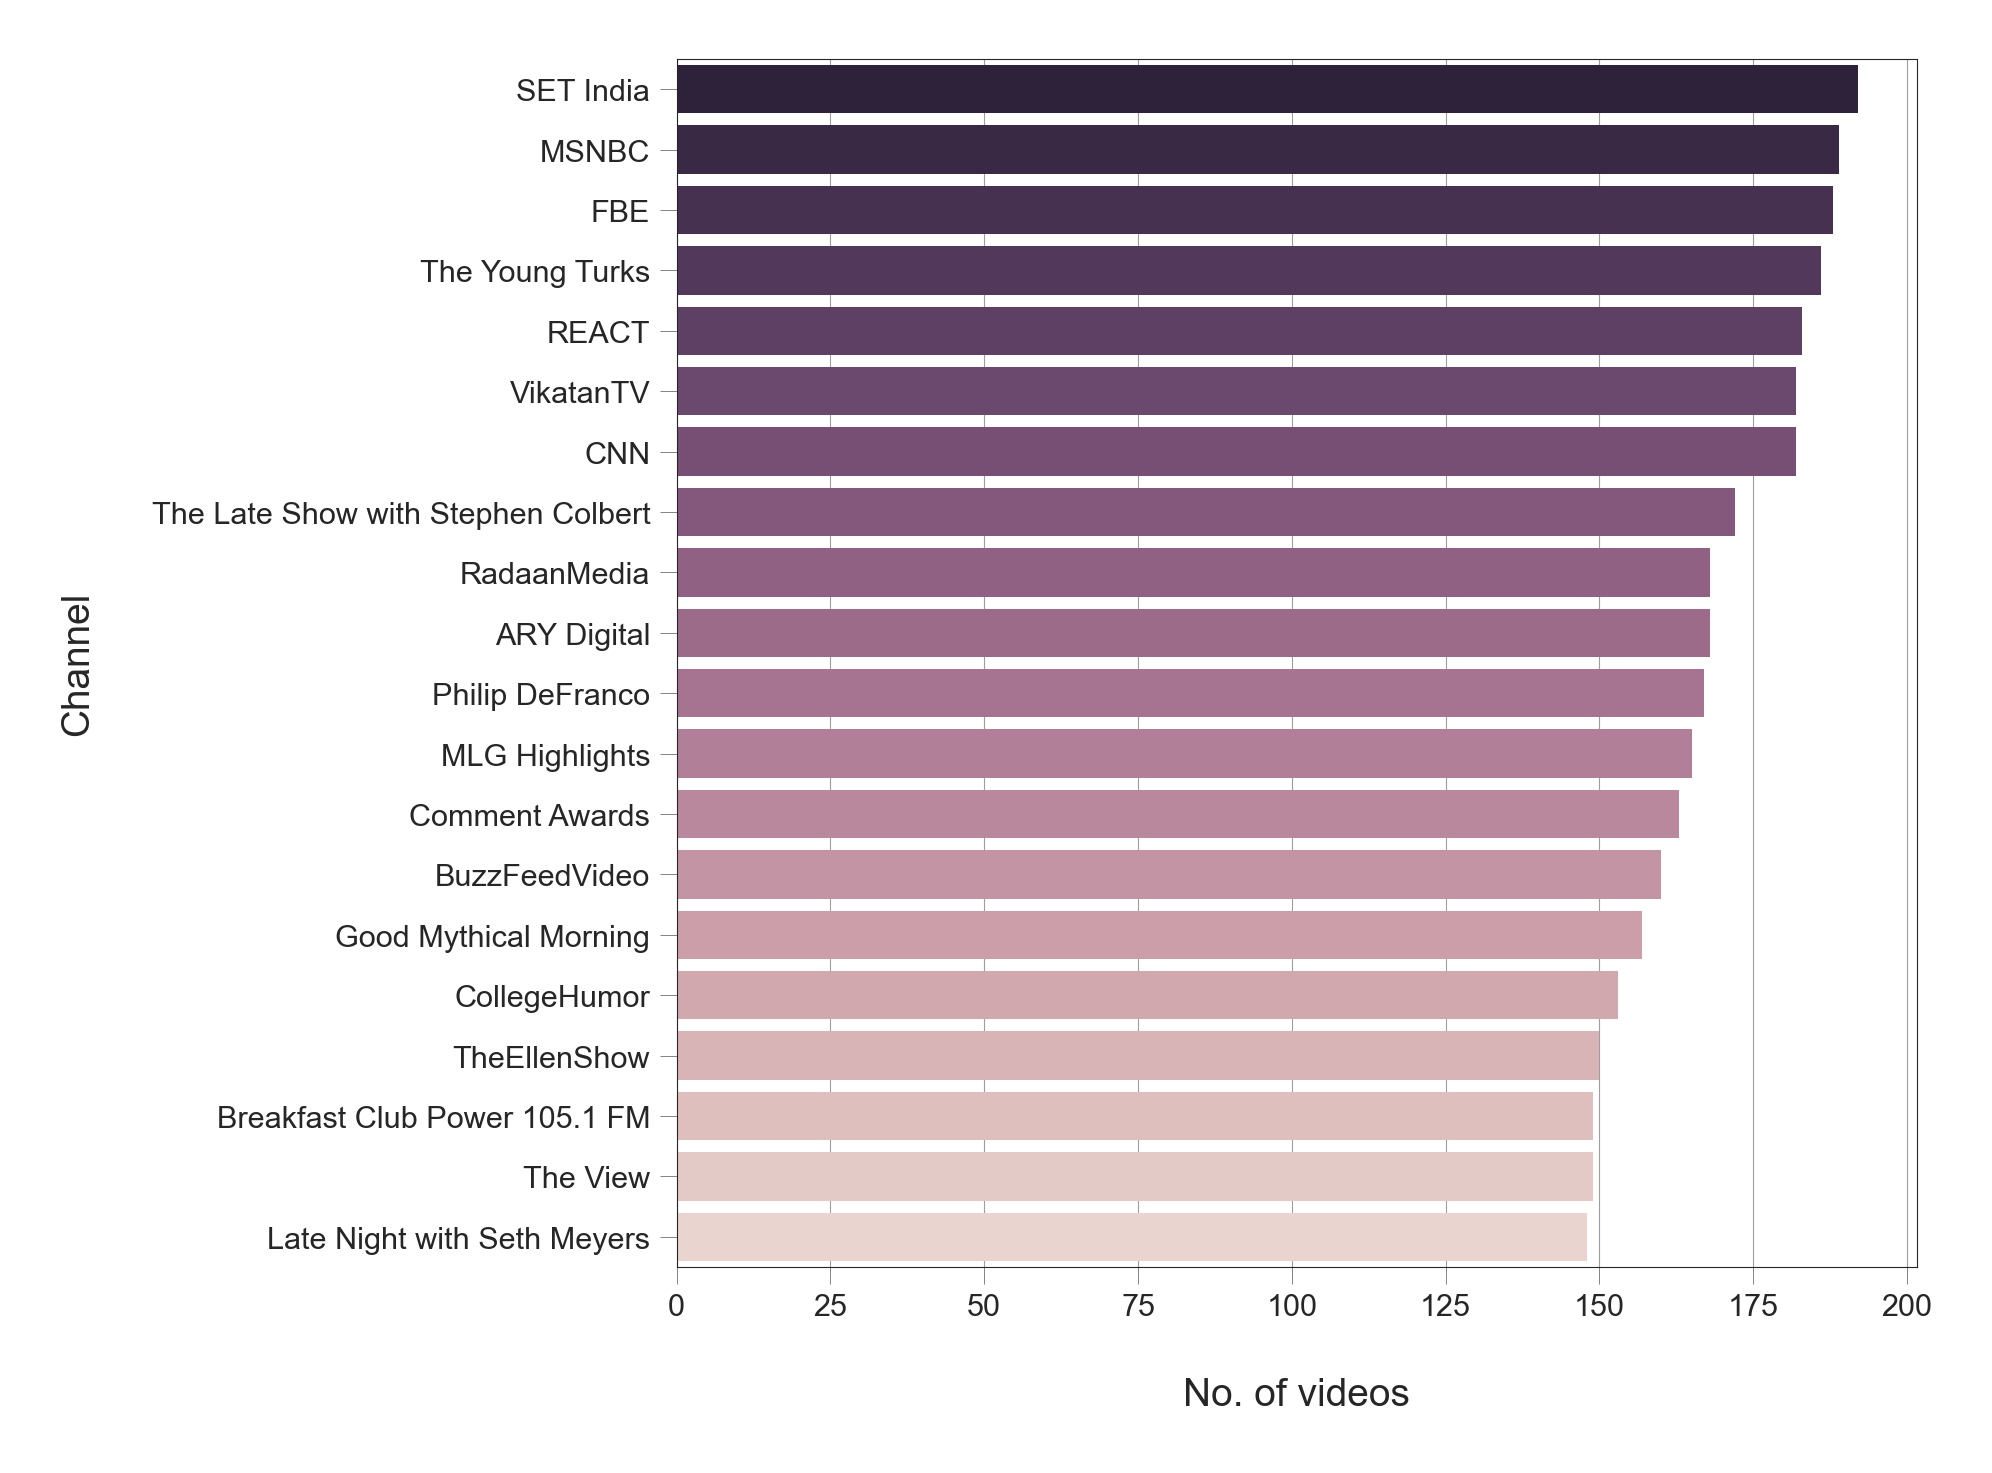

In [31]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [32]:
with open("CA_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

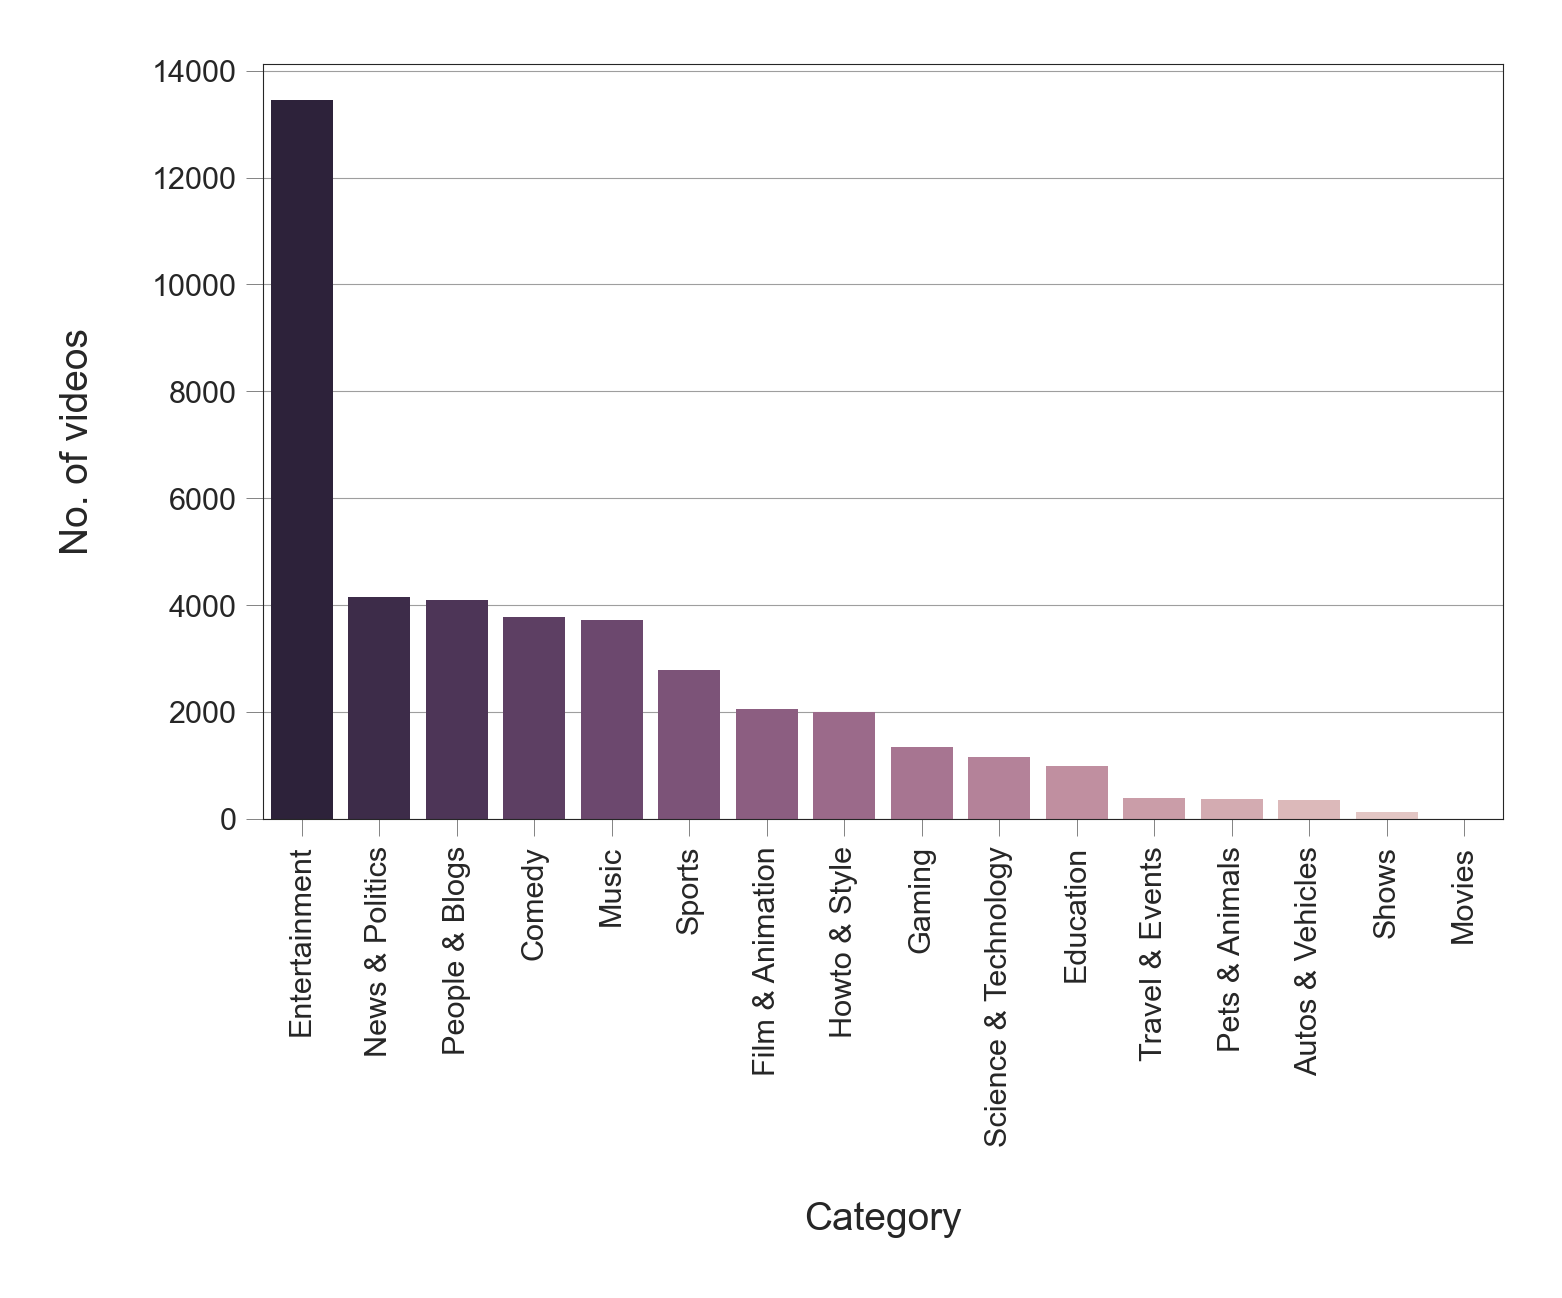

In [33]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

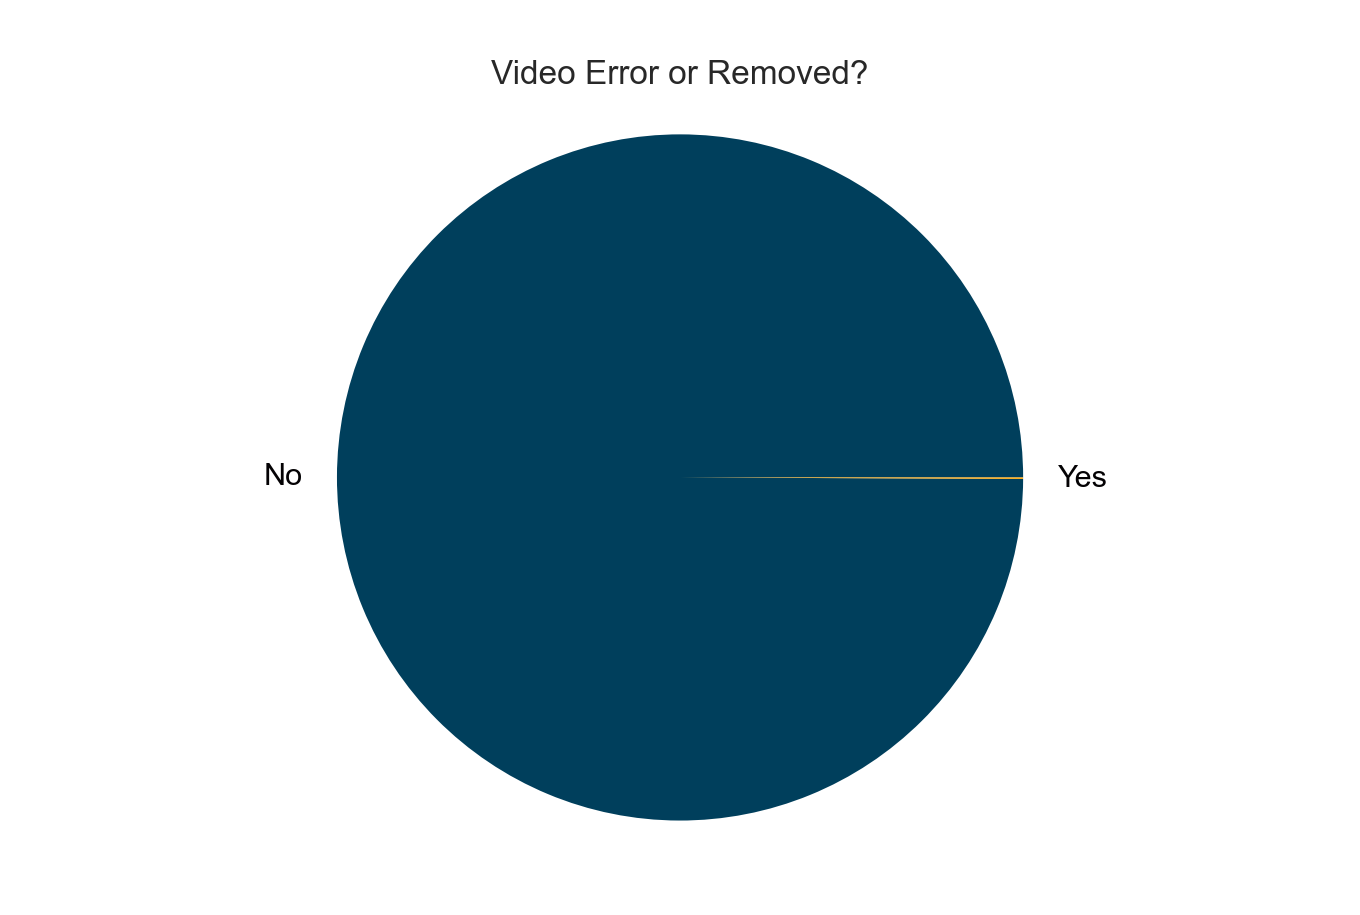

In [34]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [35]:
df["video_error_or_removed"].value_counts()

False    40854
True        27
Name: video_error_or_removed, dtype: int64

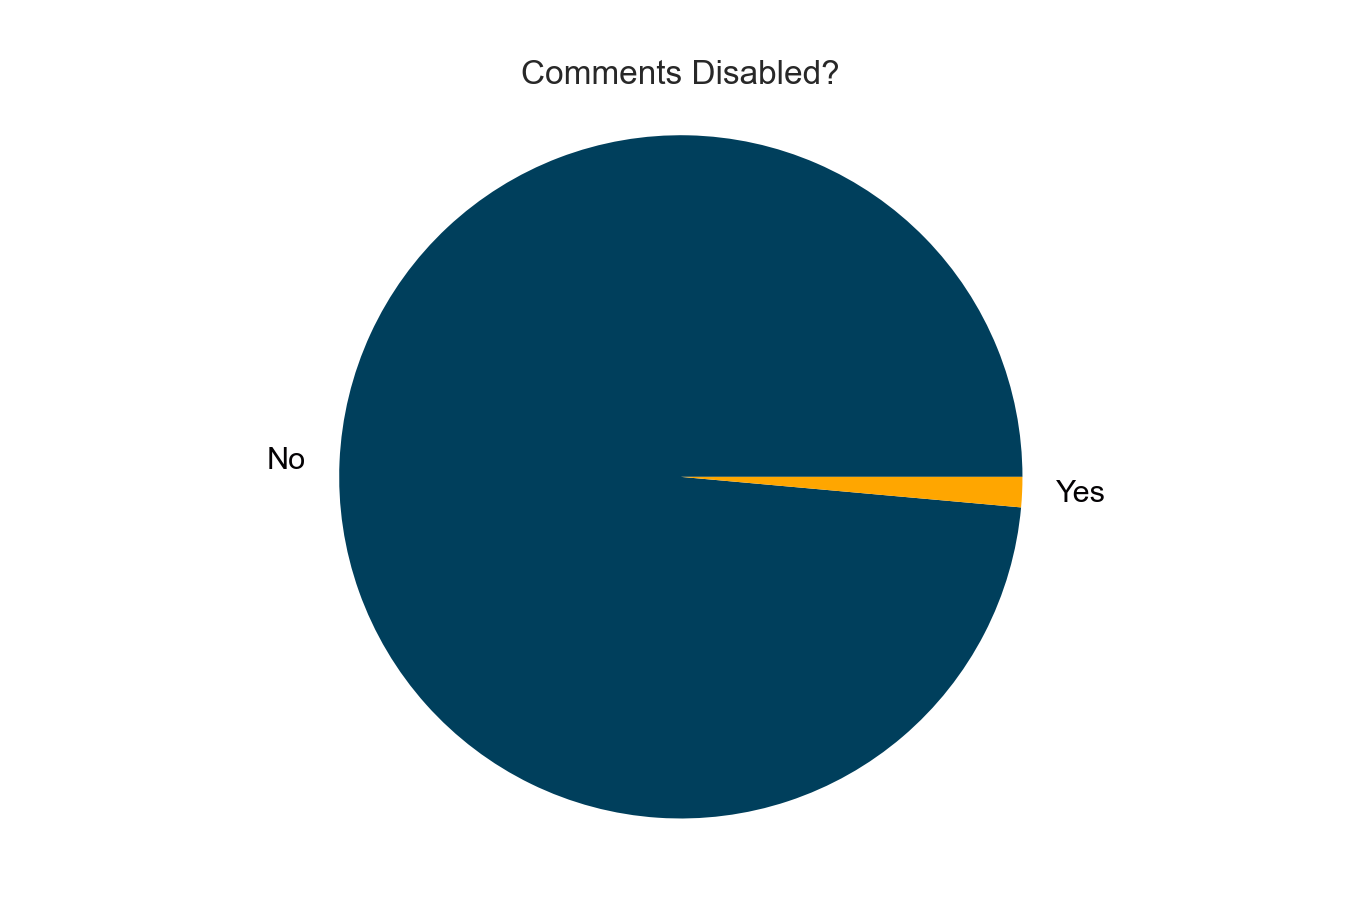

In [36]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [37]:
df["comments_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

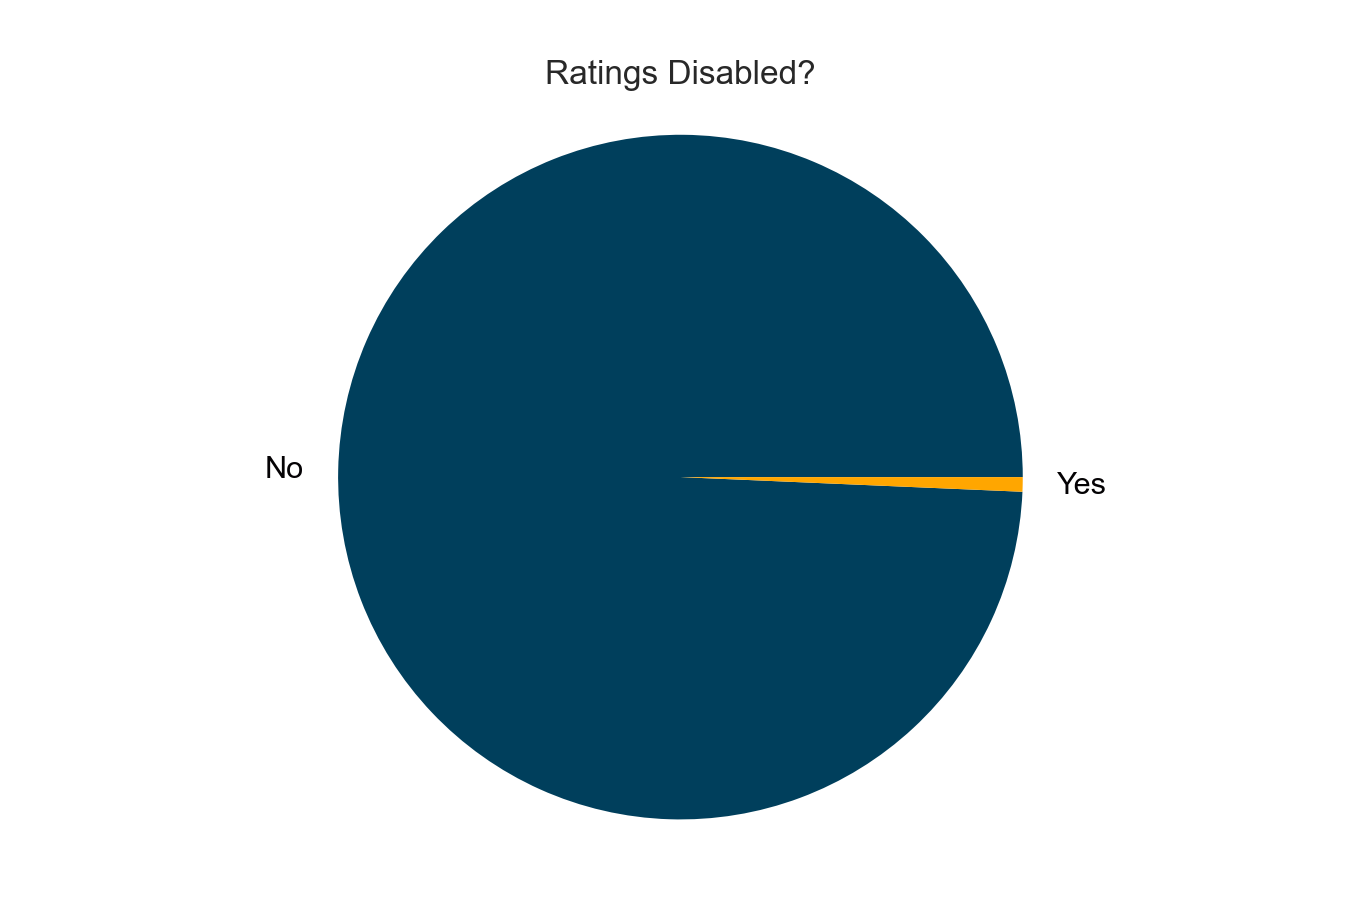

In [38]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [39]:
df["ratings_disabled"].value_counts()

False    40602
True       279
Name: ratings_disabled, dtype: int64

In [40]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

63